# Distribuições de probabilidade

In [4]:
from scipy.stats import norm, binom, poisson
import matplotlib.pyplot as plt

1. **Distribuição Normal:**
   - A distribuição normal é uma distribuição de probabilidade contínua que é simétrica em torno da média.

In [6]:
# Parâmetros da distribuição normal
media = 0
desvio_padrao = 1

# Gerando valores aleatórios com distribuição normal
valores_aleatorios = norm.rvs(loc=media, scale=desvio_padrao, size=1000)

# Calculando a densidade de probabilidade (PDF) para um determinado valor
valor = 1
probabilidade = norm.pdf(valor, loc=media, scale=desvio_padrao)
print("Probabilidade de", valor, "na distribuição normal:", probabilidade)

Probabilidade de 1 na distribuição normal: 0.24197072451914337


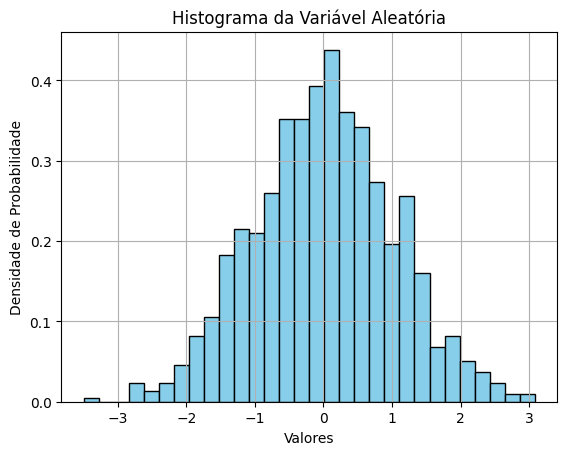

In [7]:
# Gerando o histograma
plt.hist(valores_aleatorios, bins=30, density=True, color='skyblue', edgecolor='black')
plt.title('Histograma da Variável Aleatória')
plt.xlabel('Valores')
plt.ylabel('Densidade de Probabilidade')
plt.grid(True)
plt.show()

2. **Distribuição Binomial:**
   - A distribuição binomial descreve o número de sucessos em uma sequência de tentativas de Bernoulli independentes.

In [8]:
# Parâmetros da distribuição binomial
numero_de_experimentos = 10
probabilidade_de_sucesso = 0.5

# Gerando valores aleatórios com distribuição binomial
valores_aleatorios = binom.rvs(n=numero_de_experimentos, p=probabilidade_de_sucesso, size=1000)

# Calculando a probabilidade de obter um número específico de sucessos
numero_de_sucessos = 5
probabilidade = binom.pmf(numero_de_sucessos, n=numero_de_experimentos, p=probabilidade_de_sucesso)
print("Probabilidade de", numero_de_sucessos, "sucessos na distribuição binomial:", probabilidade)

Probabilidade de 5 sucessos na distribuição binomial: 0.24609375


3. **Distribuição de Poisson:**
   - A distribuição de Poisson descreve o número de eventos ocorrendo em um intervalo de tempo ou espaço fixo.

In [9]:
# Parâmetro da distribuição de Poisson
taxa_de_ocorrencia = 3

# Gerando valores aleatórios com distribuição de Poisson
valores_aleatorios = poisson.rvs(mu=taxa_de_ocorrencia, size=1000)

# Calculando a probabilidade de ocorrer um número específico de eventos
numero_de_eventos = 2
probabilidade = poisson.pmf(numero_de_eventos, mu=taxa_de_ocorrencia)
print("Probabilidade de", numero_de_eventos, "eventos na distribuição de Poisson:", probabilidade)

Probabilidade de 2 eventos na distribuição de Poisson: 0.22404180765538775


* **Caso de Uso:** Na área de controle de qualidade em uma linha de produção. Por exemplo, a distribuição normal pode ser usada para modelar a distribuição de pesos de produtos, a binomial para calcular a probabilidade de um certo número de produtos defeituosos em uma amostra, e a Poisson para prever a taxa de ocorrência de falhas em um determinado período de tempo. Isso ajuda a empresa a tomar decisões informadas sobre ajustes na produção e garantir a qualidade do produto final.

In [10]:
import os
import findspark
findspark.init(os.environ['SPARK_HOME'])

import numpy as np
import seaborn as sns

from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.sql.types import FloatType

In [11]:
# Criar uma sessão Spark
spark = SparkSession.builder \
    .appName("Controle de Qualidade") \
    .getOrCreate()

# Gerar dados de peso dos produtos (distribuição normal)
num_samples = 1000
mean_weight = 500
stddev_weight = 10
weights = np.random.normal(mean_weight, stddev_weight, num_samples)
data = np.array([round(weight, 6) for weight in weights])

# Criar um DataFrame Spark com os dados
df = spark.createDataFrame(data.tolist(), FloatType()).toDF("peso")

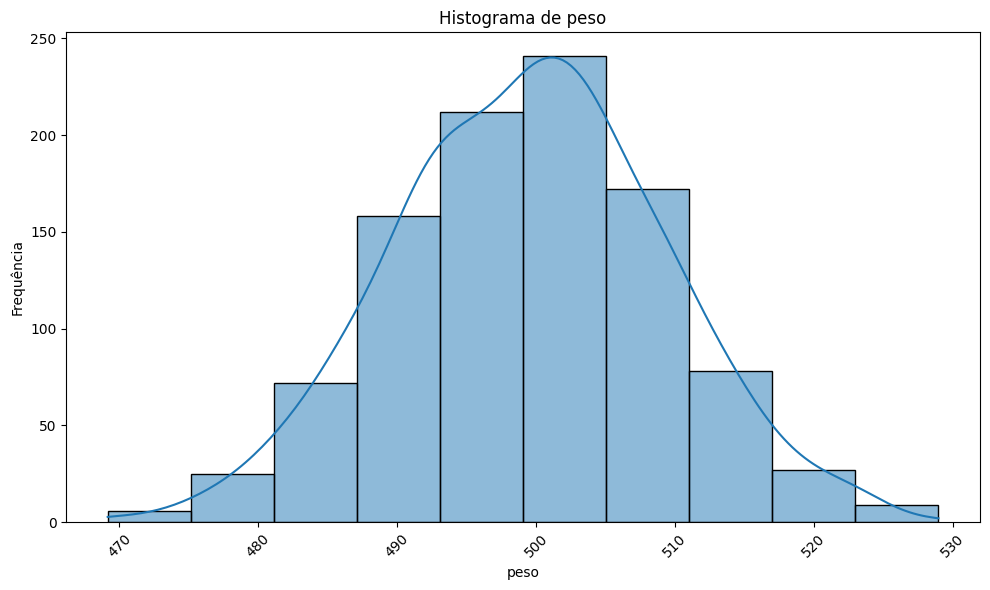

In [12]:
dados = df.toPandas()

# Criar o histograma com Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=dados, x='peso', bins=10, kde=True)
plt.title('Histograma de peso')
plt.xlabel('peso')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
# Definir um limite para produtos defeituosos
limite_defeitos = 480

# Calcular a média e o desvio padrão dos pesos
mean = df.agg({"peso": "avg"}).collect()[0][0]
stddev = df.agg({"peso": "stddev"}).collect()[0][0]

In [17]:
# Calcular a probabilidade de produtos com peso abaixo do limite
prob_defeitos = df.filter(col("peso") < limite_defeitos).count() / num_samples

# Exibir os resultados
print("Média de peso dos produtos:", mean)
print("Desvio padrão dos pesos dos produtos:", stddev)
print("Probabilidade de produtos com peso abaixo de", limite_defeitos, ":", prob_defeitos)

num_defeitos = int(num_samples * prob_defeitos) # número de produtos defeituosos esperados
print("Número de produtos defeituosos esperados de", num_samples, ":", num_defeitos)

Média de peso dos produtos: 499.5152569580078
Desvio padrão dos pesos dos produtos: 9.717122218273234
Probabilidade de produtos com peso abaixo de 480 : 0.022
Número de produtos defeituosos esperados de 1000 : 22


In [18]:
# Definir parâmetros da distribuição binomial
num_amostras = 1000  # número de amostras/testes
probabilidade_defeito = 0.022  # probabilidade de um produto ser defeituoso

# Calcular a probabilidade usando a distribuição binomial
probabilidade = binom.pmf(num_defeitos, num_amostras, probabilidade_defeito)

# Exibir a probabilidade calculada
print("Probabilidade de", num_defeitos, "produtos defeituosos em", num_amostras, "amostras:", probabilidade)

# Encerrar a sessão Spark
spark.stop()

Probabilidade de 22 produtos defeituosos em 1000 amostras: 0.08568080580621867


In [19]:
1 - probabilidade

0.9143191941937814